<a href="https://colab.research.google.com/github/raghavendrakulkarni14/Cardiovascular_risk_prediction_classification/blob/main/RaghavendraAKulkarniClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [60]:
#mounting the drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [139]:
#reading the dataset using pandas library
df=pd.read_csv('/content/drive/MyDrive/Alma Capstone -3 classification/data_cardiovascular_risk.csv')

In [62]:
#brief look over the dataset
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [63]:
#looking at the datatypes of the variables
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [64]:
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [65]:
#Knowing the correlation among the variables
df.corr()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,1.000000,0.016759,-0.030573,-0.017249,0.007080,-0.038873,0.013236,0.003690,-0.019889,0.019676,0.000832,0.039849,0.024684,0.015517,0.009866
age,0.016759,1.000000,-0.172559,-0.192335,0.124376,0.059038,0.308826,0.107875,0.274028,0.404845,0.221896,0.138176,-0.002596,0.116135,0.224927
education,-0.030573,-0.172559,1.000000,0.011126,-0.019920,-0.034194,-0.084817,-0.052013,-0.020781,-0.137195,-0.060801,-0.133313,-0.046980,-0.038732,-0.052751
cigsPerDay,-0.017249,-0.192335,0.011126,1.000000,-0.037080,-0.042057,-0.079312,-0.049016,-0.024703,-0.100834,-0.068785,-0.100996,0.066759,-0.068797,0.066778
BPMeds,0.007080,0.124376,-0.019920,-0.037080,1.000000,0.119402,0.259548,0.071316,0.083299,0.263729,0.201217,0.087932,0.018107,0.064490,0.088020
prevalentStroke,-0.038873,0.059038,-0.034194,-0.042057,0.119402,1.000000,0.071652,0.010115,-0.010832,0.057568,0.047235,0.018602,-0.019184,0.023607,0.068627
prevalentHyp,0.013236,0.308826,-0.084817,-0.079312,0.259548,0.071652,1.000000,0.082565,0.159680,0.699285,0.612897,0.300464,0.150815,0.086658,0.166544
diabetes,0.003690,0.107875,-0.052013,-0.049016,0.071316,0.010115,0.082565,1.000000,0.059080,0.124011,0.061165,0.089112,0.039742,0.620211,0.103681
totChol,-0.019889,0.274028,-0.020781,-0.024703,0.083299,-0.010832,0.159680,0.059080,1.000000,0.199159,0.154974,0.114305,0.087458,0.062723,0.094306
sysBP,0.019676,0.404845,-0.137195,-0.100834,0.263729,0.057568,0.699285,0.124011,0.199159,1.000000,0.781908,0.333864,0.178262,0.143090,0.212703


In [66]:
#Checking for the null values
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [67]:
#storing the variable which have null values
nullcol=['cigsPerDay','BPMeds','totChol','BMI','glucose']

# ***Handling the null values***

In [144]:
#Treating the null values by applying statistic mean over them 
for x in nullcol:
  df[x].fillna(df[x].mean(), inplace=True)

In [145]:
#dropping the single row which had null value
df.dropna(subset = ["heartRate"], inplace=True)

In [70]:
df.isnull().sum()

id                  0
age                 0
education          87
sex                 0
is_smoking          0
cigsPerDay          0
BPMeds              0
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                 0
heartRate           0
glucose             0
TenYearCHD          0
dtype: int64

In [71]:
#dropping the variables which are insignificant
df.drop(labels=['id','education'],inplace=True,axis=1)

In [72]:
df.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1
1,36,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0
2,46,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0
3,50,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1
4,64,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0


In [73]:
dist_col=['totChol','sysBP','diaBP','BMI','heartRate','glucose']

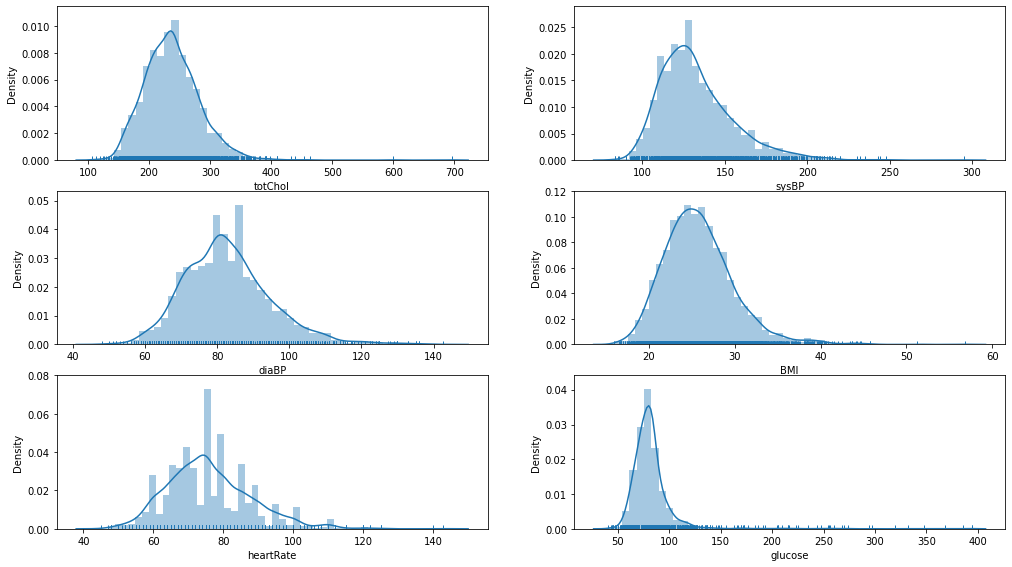

In [74]:
#lets look at the distribution of the data using distplot
plt.figure(figsize=(17,13))
for i in range(len(dist_col)):
    plt.subplot(4,2,i+1)
    sns.distplot(df[dist_col[i]], hist=True, rug=True)

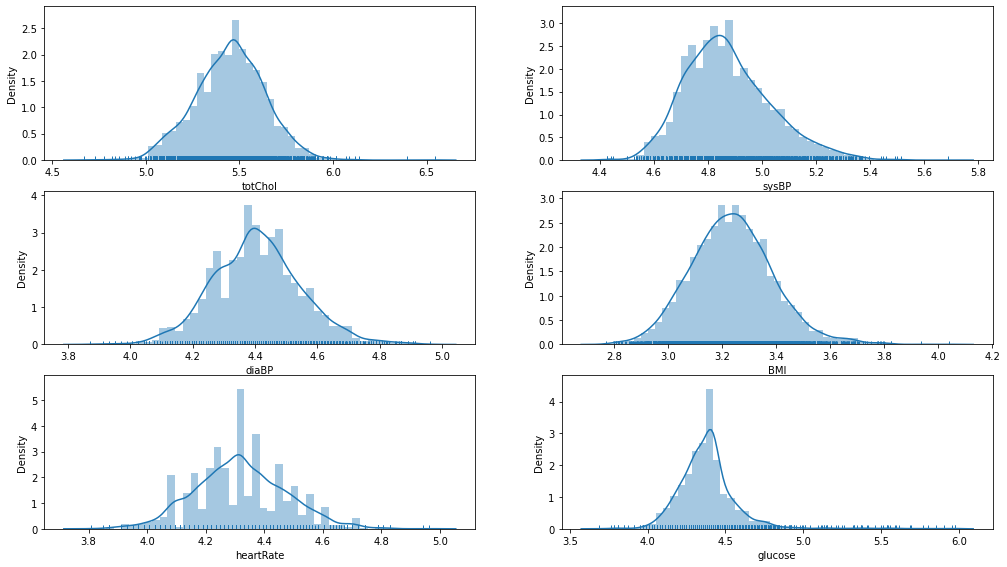

In [75]:
#normalizing the data using log tranformation
plt.figure(figsize=(17,13))
for i in range(len(dist_col)):
    plt.subplot(4,2,i+1)
    sns.distplot(np.log(df[dist_col[i]]), hist=True, rug=True)

# ***Checking for outliers using boxplots***

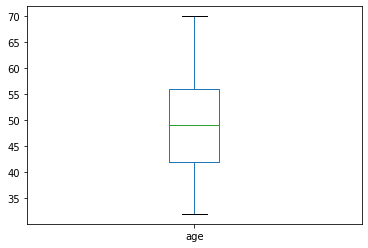

In [76]:
df.age.plot.box()

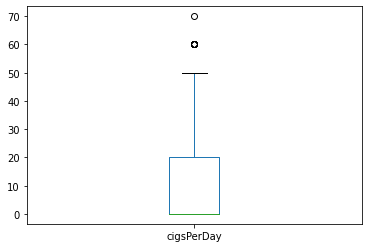

In [77]:
df.cigsPerDay.plot.box()

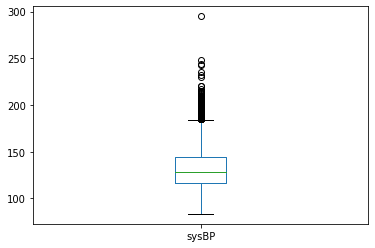

In [78]:
df.sysBP.plot.box()

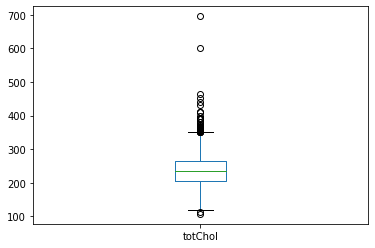

In [79]:
df.totChol.plot.box() 

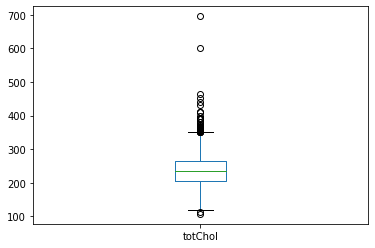

In [80]:
df.totChol.plot.box() 

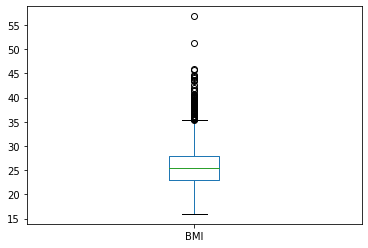

In [81]:
df.BMI.plot.box() 

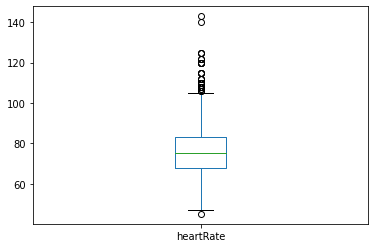

In [82]:
df.heartRate.plot.box() 

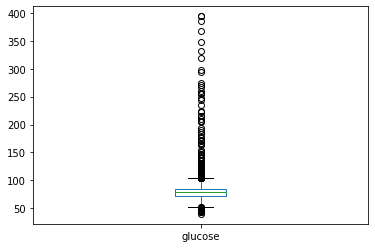

In [83]:
df.glucose.plot.box()    

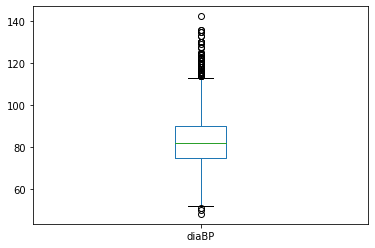

In [84]:
df.diaBP.plot.box()

In [85]:
box_col=['totChol','sysBP','diaBP','BMI','heartRate','glucose']

In [86]:
#applying log tranformation on the data to remove outliers
for i in box_col:
    df[i]=np.log(df[i]+1)

In [87]:
df.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,F,YES,3.0,0.0,0,0,0,5.402677,5.003946,4.454347,3.288214,4.510860,4.394449,1
1,36,M,NO,0.0,0.0,0,1,0,5.361292,5.129899,4.595120,3.426540,4.290459,4.330733,0
2,46,F,YES,10.0,0.0,0,0,0,5.525453,4.762174,4.276666,3.061052,4.488636,4.553877,0
3,50,M,YES,20.0,0.0,0,1,0,5.455321,5.068904,4.488636,3.376221,4.234107,4.553877,1
4,64,F,YES,30.0,0.0,0,0,0,5.488938,4.923624,4.454347,3.311273,4.262680,4.356709,0


In [142]:
#Label encoding using lambda function
df['sex']=df['sex'].apply(lambda x:0 if x=='F' else 1)
df['is_smoking']=df['is_smoking'].apply(lambda x:0 if x=='NO' else 1)

In [95]:
df.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,1,1,3.0,0.0,0,0,0,5.402677,5.003946,4.454347,3.288214,4.510860,4.394449,1
1,36,1,1,0.0,0.0,0,1,0,5.361292,5.129899,4.595120,3.426540,4.290459,4.330733,0
2,46,1,1,10.0,0.0,0,0,0,5.525453,4.762174,4.276666,3.061052,4.488636,4.553877,0
3,50,1,1,20.0,0.0,0,1,0,5.455321,5.068904,4.488636,3.376221,4.234107,4.553877,1
4,64,1,1,30.0,0.0,0,0,0,5.488938,4.923624,4.454347,3.311273,4.262680,4.356709,0


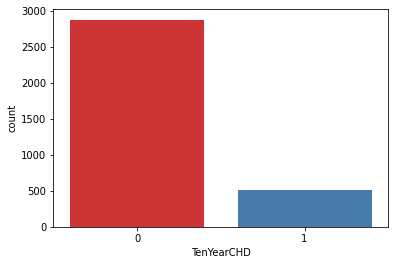

In [140]:
sns.countplot(x="TenYearCHD", data=df,palette='Set1')

In [146]:
#Oversampling the data using smote technique
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 101)
X, y = smote.fit_resample(df[['age','sex','is_smoking','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose']], df['TenYearCHD'])


In [147]:
#Creating a new Oversampled Data Frame
newdf = pd.DataFrame(X,columns = ['age','sex','is_smoking','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose'])
newdf['TenYearCHD']=y


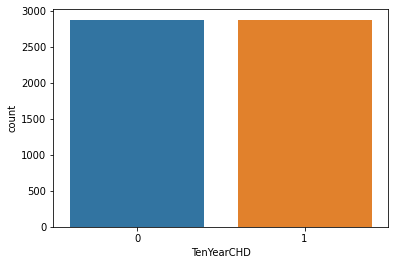

In [148]:
#to check the balance of data using countplot
sns.countplot(newdf['TenYearCHD'])

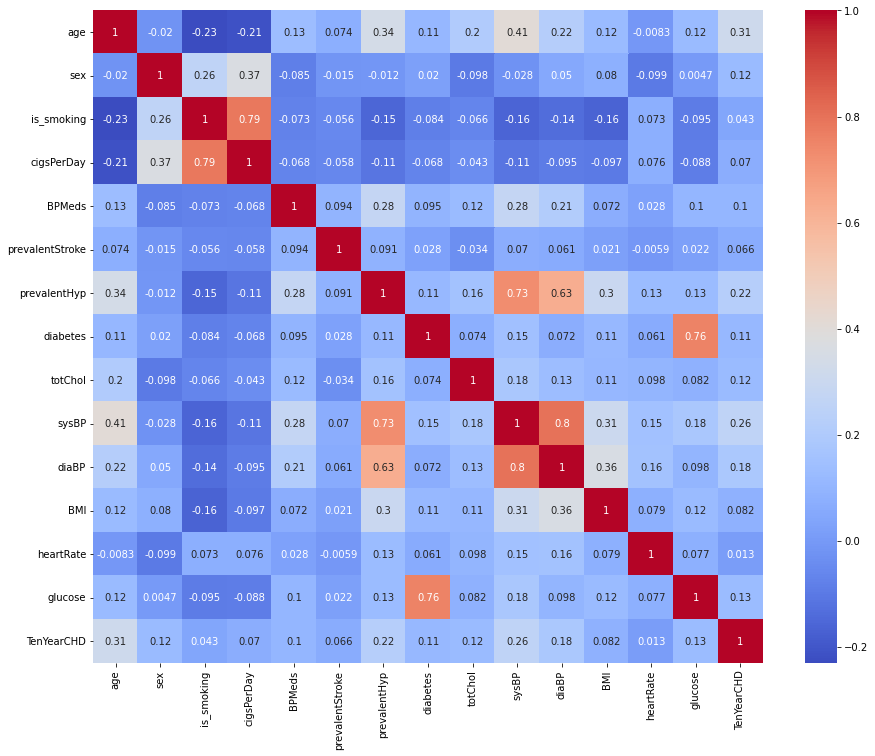

In [149]:
#heatmap to see the correlation among the variables
plt.figure(figsize=(15,12))
correlation=newdf.corr()
sns.heatmap(correlation,annot=True,cmap='coolwarm')

In [150]:
#preparing the data to scale down
newdf.pop(item='TenYearCHD')

0       1
1       0
2       0
3       1
4       0
       ..
5753    1
5754    1
5755    1
5756    1
5757    1
Name: TenYearCHD, Length: 5758, dtype: int64

In [151]:
newdf

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,64.000000,0.000000,1.000000,3.000000,0.000000,0.0,0.000000,0.0,221.000000,148.000000,85.000000,25.794964,90.000000,80.000000
1,36.000000,1.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0,212.000000,168.000000,98.000000,29.770000,72.000000,75.000000
2,46.000000,0.000000,1.000000,10.000000,0.000000,0.0,0.000000,0.0,250.000000,116.000000,71.000000,20.350000,88.000000,94.000000
3,50.000000,1.000000,1.000000,20.000000,0.000000,0.0,1.000000,0.0,233.000000,158.000000,88.000000,28.260000,68.000000,94.000000
4,64.000000,0.000000,1.000000,30.000000,0.000000,0.0,0.000000,0.0,241.000000,136.500000,85.000000,26.420000,70.000000,77.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5753,57.949171,0.949171,1.000000,14.745857,0.050829,0.0,0.050829,0.0,264.406629,156.050829,85.695029,26.004254,90.881771,102.593371
5754,52.378352,0.310824,0.310824,4.662359,0.000000,0.0,0.000000,0.0,360.364458,127.506947,82.378352,24.509454,68.284007,77.419063
5755,60.410177,1.000000,0.000000,0.000000,0.000000,0.0,0.264970,0.0,248.555384,162.064379,94.324852,28.859327,86.410177,99.119764
5756,44.000000,0.998371,1.000000,14.990226,0.000000,0.0,1.000000,0.0,232.008266,141.010588,103.986968,27.385196,75.004887,82.086520


In [152]:
#applying StandardScalar 
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [153]:
df=ss.fit_transform(newdf)
df=pd.DataFrame(df,columns=['age','sex','is_smoking','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose'])

In [154]:
df

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.526086,-1.007118,1.013697,-0.552795,-0.233711,-0.113096,-0.824628,-0.20994,-0.431812,0.483100,0.041265,-0.052607,1.225951,-0.155025
1,-1.847382,1.124033,-1.059556,-0.805408,-0.233711,-0.113096,1.305762,-0.20994,-0.626162,1.331899,1.088050,0.970894,-0.352545,-0.316691
2,-0.642572,-1.007118,1.013697,0.036634,-0.233711,-0.113096,-0.824628,-0.20994,0.194430,-0.874977,-1.086043,-1.454590,1.050563,0.297641
3,-0.160648,1.124033,1.013697,0.878676,-0.233711,-0.113096,1.305762,-0.20994,-0.172677,0.907499,0.282830,0.582096,-0.703322,0.297641
4,1.526086,-1.007118,1.013697,1.720717,-0.233711,-0.113096,-0.824628,-0.20994,0.000079,-0.004959,0.041265,0.108328,-0.527934,-0.252024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5753,0.797077,1.015709,1.013697,0.436255,0.049942,-0.113096,-0.716344,-0.20994,0.505534,0.824777,0.097230,0.001281,1.303277,0.575492
5754,0.125899,-0.344705,-0.415140,-0.412818,-0.233711,-0.113096,-0.824628,-0.20994,2.577697,-0.386623,-0.169836,-0.383604,-0.678416,-0.238475
5755,1.093581,1.124033,-1.059556,-0.805408,-0.233711,-0.113096,-0.260138,-0.20994,0.163234,1.079991,0.792120,0.736412,0.911144,0.463179
5756,-0.883534,1.120561,1.013697,0.456832,-0.233711,-0.113096,1.305762,-0.20994,-0.194093,0.186470,1.570132,0.356849,-0.089034,-0.087561


In [155]:
df['TenTearCHD']=y

In [156]:
df.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenTearCHD
0,1.526086,-1.007118,1.013697,-0.552795,-0.233711,-0.113096,-0.824628,-0.20994,-0.431812,0.483100,0.041265,-0.052607,1.225951,-0.155025,1
1,-1.847382,1.124033,-1.059556,-0.805408,-0.233711,-0.113096,1.305762,-0.20994,-0.626162,1.331899,1.088050,0.970894,-0.352545,-0.316691,0
2,-0.642572,-1.007118,1.013697,0.036634,-0.233711,-0.113096,-0.824628,-0.20994,0.194430,-0.874977,-1.086043,-1.454590,1.050563,0.297641,0
3,-0.160648,1.124033,1.013697,0.878676,-0.233711,-0.113096,1.305762,-0.20994,-0.172677,0.907499,0.282830,0.582096,-0.703322,0.297641,1
4,1.526086,-1.007118,1.013697,1.720717,-0.233711,-0.113096,-0.824628,-0.20994,0.000079,-0.004959,0.041265,0.108328,-0.527934,-0.252024,0


In [158]:
#Splitting the data into train and test data
from sklearn.model_selection import train_test_split
x=df.iloc[:,:-1]
y=df.iloc[:,-1:]

In [184]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state = 5)


# **Logistic Regression Model**

In [185]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [186]:
predict=lr.predict(xtest)

In [188]:
#Evaluating the logistic regression using the metrics
print ("The accuracy of Logistic Regression is : ", accuracy_score(ytest, predict)*100, "%")
print ("The precision of Logistic Regression is : ", precision_score(ytest, predict)*100, "%")
print ("The recall of Logistic Regression is : ", recall_score(ytest, predict)*100, "%")


The accuracy of Logistic Regression is :  66.18055555555556 %
The precision of Logistic Regression is :  66.89750692520776 %
The recall of Logistic Regression is :  66.07387140902873 %


In [163]:
print("The confusion matrix of Logistic Regression is:\n",confusion_matrix(ytest,predict))

The confusion matrix of Logistic Regression is:
 [[470 239]
 [248 483]]


In [164]:
#Hyper parameter tunning
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [165]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=5)
grid_search = GridSearchCV(estimator=lr, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

In [166]:
grid_result = grid_search.fit(xtrain,ytrain)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.672460 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


# **KNearestNeigbors Model**

In [167]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier


neighbors = np.arange(1,12)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(xtrain, ytrain)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(xtrain, ytrain)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(xtest, ytest) 

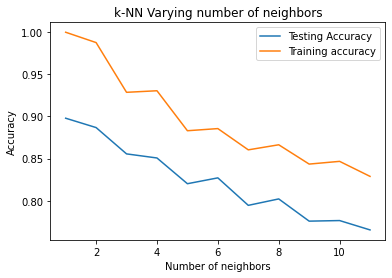

In [168]:
# Generate the plot between test accuracy and train accuracy to determine k value
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [193]:
#Fitting the model
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [206]:
y_pred = knn.predict(xtest)

In [207]:
#Evaluating the KNN model using the metrics
print("The accuracy of KNN model is :",knn.score(xtest,ytest)*100,"%")
print("The recall of KNN model is :",recall_score(ytest,y_pred)*100,'%')
print("The precision of KNN model is :",precision_score(ytest,y_pred)*100,'%')


The accuracy of KNN model is : 77.56944444444444 %
The recall of KNN model is : 86.32010943912448 %
The precision of KNN model is : 73.88758782201405 %


In [189]:
#Hyper parameter tunning
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(x,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [190]:
knn_cv.best_score_

0.9015276571097596

In [191]:
knn_cv.best_params_

{'n_neighbors': 1}

In [175]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 0, stratify = y)

# **Random Forest Classifier Model**

In [176]:
from sklearn.ensemble import RandomForestClassifier

In [177]:
rf = RandomForestClassifier(random_state=0) 
grid_values = {'n_estimators':[50, 80,100], 'max_depth':[3, 5, 7]}
rf = GridSearchCV(estimator=rf, param_grid = grid_values, scoring = 'roc_auc', cv=5)

In [178]:
rf.fit(x,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [179]:
rpred=rf.predict(xtest)

In [180]:
print("The roc_auc_score of RandomForestClassifier is:",roc_auc_score(ytest,rpred)*100,'%')
print("The precision of RandomForestClassifier is:",precision_score(ytest,rpred)*100,'%')
print("The recall of RandomForestClassifier is:",recall_score(ytest,rpred)*100,'%')



The roc_auc_score of RandomForestClassifier is: 88.10763888888889 %
The precision of RandomForestClassifier is: 91.02803738317758 %
The recall of RandomForestClassifier is: 84.54861111111111 %


In [181]:
print("The confusion matrix for RandomForestClassifier is:\n",confusion_matrix(ytest,rpred))

The confusion matrix for RandomForestClassifier is:
 [[528  48]
 [ 89 487]]


In [182]:
rf.best_params_

{'max_depth': 7, 'n_estimators': 100}

In [183]:
rf.best_score_

0.9099151203116614

#**Summary**


## 1.Handled the majority of the null values by replacing with the mean values and dropped a single row which had null value in heartrate column.

## 2.Treated the outliers using log tranformation.

##3.Handled the imbalanced class by applying SMOTE technique.

##4.Using StandardSCalar the data was scaled down.

##5.Applied 3 machine learning model on the dataset i.e. 
###   -Logistic Regression
###   -KNearestNeighbors
###   -Random Forest Classifier

##6.Performed hyper parameter tunnig on all the 3 machine learning models to get best parameters and best score.

##7.Random Forest Classifier has the highest accuracy score among al the 3 model i.e. 88.10 %.

